**Exercise 1-2.**  
Load the image *dog.jpg* and compute the economy SVD. Compute the relative reconstruction error of the truncated SVD in the *Frobenius* norm as a function of the rank *r*. Square this error to compute the fraction of missing variance as a function of *r*. You may also decide to plot 1 minus the error or missing variance to visualize the amount of norm or variance captured at a given rank *r*.  

Plot these quantities along with the cumulative sum of singular values as a function of *r*. Find the rank *r* where the reconstruction captures 99% of the total variance. Compare this with the rank *r* where the reconstruction captures 99% in the Frobenius norm and with the rank *r* that captures 99% of the cumulative sum of singular values.


Image shape: (2000, 1500)


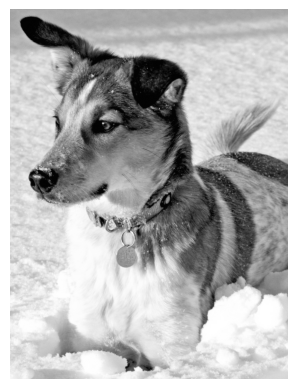

In [122]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import os
import pandas as pd

dog = Image.open(os.path.join("..","data", "dog.jpg")).convert("L")
X = np.array(dog)
n,m = X.shape
plt.imshow(X, cmap='gray')
plt.axis('off')
print(f"Image shape: {X.shape}")

In [123]:
U_hat, S_hat, Vt_hat = np.linalg.svd(X, full_matrices=False) # Economy SVD

In [124]:
res_df = pd.DataFrame(columns=['r', 'relative_error', 'variance_at_r', 'missing_var', 'singvals_sum'])
norm_X = np.linalg.norm(X, "fro")
res_df = pd.concat([res_df, pd.DataFrame([[0, 1, 0, 1, 0]], 
                                         columns=res_df.columns)], ignore_index=True)

for r in range(1, S_hat.size+1):
    X_approx = U_hat[:, :r] @ np.diag(S_hat[:r]) @ Vt_hat[:r, :]
    relative_error = np.linalg.norm(X - X_approx, "fro") / norm_X
    missing_var = relative_error**2
    variance_at_r = 1 - missing_var
    singvals_sum = np.sum(S_hat[:r]) / np.sum(S_hat)
    res_df = pd.concat([res_df, pd.DataFrame([[r, relative_error, variance_at_r, missing_var, singvals_sum]], 
                                             columns=res_df.columns)], ignore_index=True)

r99rel_error = res_df[res_df['relative_error'] <= 0.01].iloc[0]
r99var = res_df[res_df['variance_at_r'] >= 0.99].iloc[0]
r99cumsingvals = res_df[res_df["singvals_sum"] >= 0.99].iloc[0]

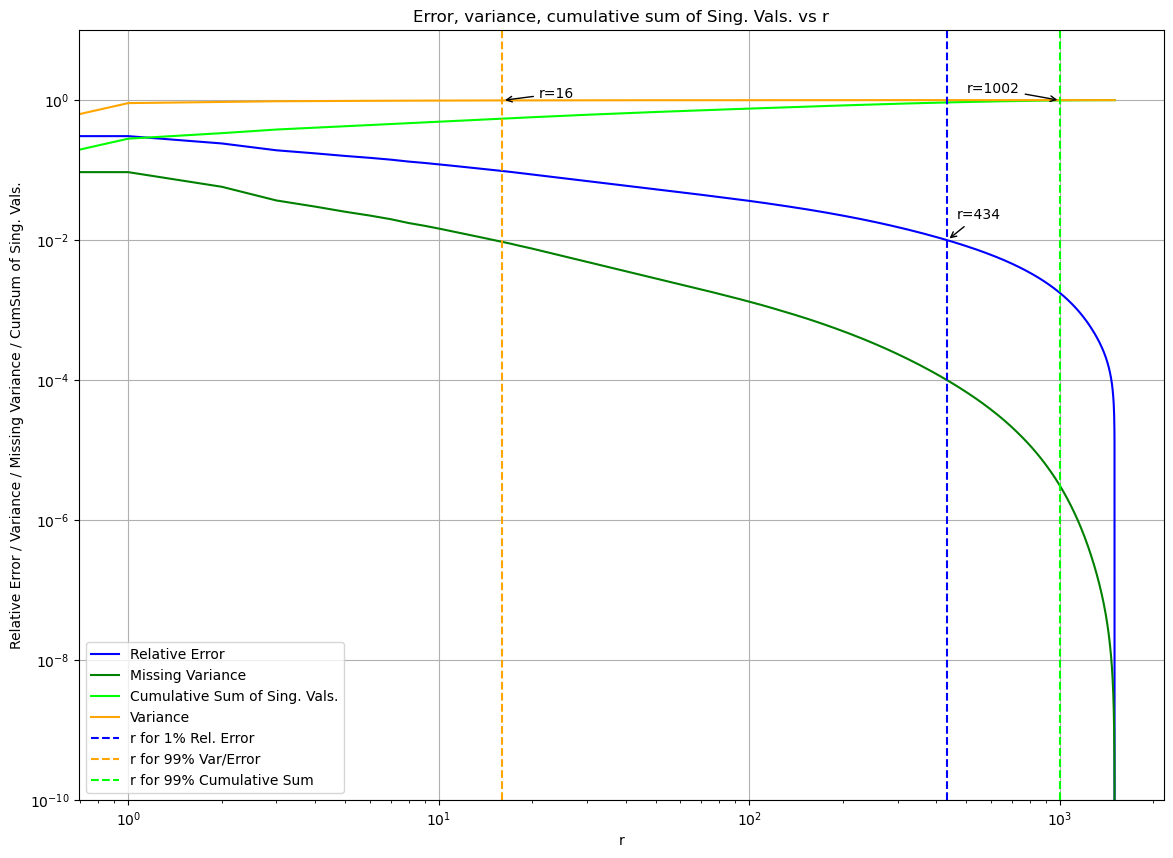

In [143]:
# Gráfico 1: Errores y varianza
plt.figure(figsize=(14, 10))

plt.plot(res_df['r'], res_df['relative_error'], label='Relative Error',color='blue')
plt.plot(res_df['r'], res_df['missing_var'], label='Missing Variance', color='green')
plt.plot(res_df['r'], res_df['singvals_sum'], label='Cumulative Sum of Sing. Vals.',color='lime')
plt.plot(res_df['r'], res_df['variance_at_r'], label='Variance', color='orange')

plt.axvline(r99rel_error['r'], color='blue', linestyle='--', label='r for 1% Rel. Error')
plt.axvline(r99var['r'], color='orange', linestyle='--',label='r for 99% Var/Error')
plt.axvline(r99cumsingvals['r'], color='lime', linestyle='--', label='r for 99% Cumulative Sum')

plt.annotate(f"r={int(r99rel_error['r'])}", xy=(r99rel_error['r'], r99rel_error['relative_error']),
             xytext=(r99rel_error['r']+30, r99rel_error['relative_error']+0.01),
             arrowprops=dict(facecolor='black', arrowstyle='->'), fontsize=10)
plt.annotate(f"r={int(r99var['r'])}", xy=(r99var['r'], r99var['variance_at_r']),
             xytext=(r99var['r']+5, r99var['variance_at_r']+0.1),
             arrowprops=dict(facecolor='black', arrowstyle='->'), fontsize=10)
plt.annotate(f"r={int(r99cumsingvals['r'])}", xy=(r99cumsingvals['r'], r99cumsingvals['singvals_sum']),
             xytext=(r99cumsingvals['r']*0.5, r99cumsingvals['singvals_sum']+0.3),
             arrowprops=dict(facecolor='black', arrowstyle='->'), fontsize=10)

plt.title('Error, variance, cumulative sum of Sing. Vals. vs r')
plt.xlabel('r')
plt.ylabel('Relative Error / Variance / Missing Variance / CumSum of Sing. Vals.')
plt.title('Error, variance, cumulative sum of Sing. Vals. vs r')
plt.legend()
plt.yscale('log')
plt.xscale('log')
plt.ylim(1e-10, 10)
plt.grid(True)
plt.show()

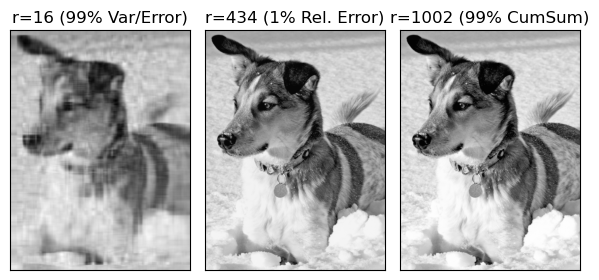

In [146]:
fig, axes = plt.subplots(1, 3, figsize=(6, 6))
ranks = [r99var['r'], r99rel_error['r'], r99cumsingvals['r']]
titles = [f"r={int(ranks[0])} (99% Var/Error)",f"r={int(ranks[1])} (1% Rel. Error)", f"r={int(ranks[2])} (99% CumSum)"]
for ax, r, title in zip(axes, ranks, titles):
    X_approx = U_hat[:, :int(r)] @ np.diag(S_hat[:int(r)]) @ Vt_hat[:int(r), :]
    ax.imshow(X_approx, cmap='gray')
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title(title)
plt.tight_layout()
plt.show()

*Conclusion:* con $r = 16$ componentes principales, la reconstrucción de la imagen alcanza aproximadamente el 99% de la varianza capturada. Esto significa que basta con conservar solo 16 valores singulares (de un total de miles, dado que la imagen es 2000×1500) para retener casi toda la “energía” o información relevante de la matriz original. Sin embargo la percepción visual es la de una imagen borrosa y con pérdida de detalles finos.
Por otra parte, la reconstrucción con $r=434$ componentes principales permite recuperar más detalles y mejorar la calidad visual de la imagen, aunque a costa de un mayor uso de recursos computacionales. Además, se sugiere explorar diferentes valores de $r$ para encontrar un equilibrio óptimo entre calidad visual y eficiencia computacional.